In [2]:
import pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df['label_indx'] = df['label'].map({'FAKE':0, 'REAL':1})
df['title_text'] = df['title'] +' '+ df['text']
df.head()

,Unnamed: 0,title,text,label,label_indx,title_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...


In [6]:
def clean_text(text):
    doc =  nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_punct or token.like_url or token.like_num or token.is_stop:
            continue
        filtered_tokens.append(token.text.lower())
    
    return " ".join(filtered_tokens)

In [7]:
clean_text(df.text[3])

'kaydee king @kaydeeking november lesson tonight dem losses time democrats start listening voters stop running establishment candidates \n people bernie @people4bernie november dems want tight race worked bernie \n walker bragman @walkerbragman november \n new york times columnist paul krugman hillary clinton outspoken surrogates contentious democratic primary blamed clinton poor performance green party candidate jill stein far received negligible number votes nationally saying stein ralph nader preventing clinton victory account @berniesteachers threw krugman analysis face candidate issue responsibility \n teachers bernie @berniesteachers november \n ana navarro republican recently endorsed hillary clinton summed preposterous nature presidential election tweet gop nominated damn candidate lose hillary clinton democrats nominated damn candidate lose trump \n ana navarro @ananavarro november \n popular left wing facebook page pro sanders primary responded trump surge simply posting meme

In [8]:
df['cleaned_text'] = df.title_text.apply(clean_text)
df.head()

,Unnamed: 0,title,text,label,label_indx,title_text,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary fear daniel greenfield shillman ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan committed politic...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....,kerry paris gesture sympathy u.s. secretary st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...,battle new york primary matters primary day ne...


In [9]:
df.to_csv('fake_real_news_clean.csv', index = False)

In [3]:
df = pd.read_csv('fake_real_news_clean.csv')

In [4]:
df.head()

,Unnamed: 0,title,text,label,label_indx,title_text,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary fear daniel greenfield shillman ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan committed politic...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....,kerry paris gesture sympathy u.s. secretary st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...,battle new york primary matters primary day ne...


### Spliting the data into training & test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.cleaned_text,
    df.label_indx,
    test_size=0.2,
    stratify=df.label_indx
)

In [6]:
X_train[0]

'smell hillary fear daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam \n final stretch election hillary rodham clinton gone war fbi \n word unprecedented thrown election ought retired unprecedented nominee major political party war fbi \n exactly hillary people coma patients waking watching hour cnn hospital beds assume fbi director james comey hillary opponent election \n fbi attack obama cnn hillary people circulated letter attacking comey currently media hit pieces lambasting targeting trump surprising clintons allies start running attack ads fbi \n fbi leadership warned entire left wing establishment form lynch mob continue going hillary fbi credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton \n covert struggle fbi agents obama doj people gone explosively public \n new york times compared comey j. edgar hoover bizarre headline james comey role recalls hoover fbi fairly pract

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [8]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [9]:
### Bert layer
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(input_text)
outputs = bert_encoder(preprocessed_text)

### Neural Network
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

### Model
model = tf.keras.Model(inputs=[input_text], outputs= [l])

In [28]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=METRICS)

In [29]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
159/159 [==============================] - 1630s 10s/step - loss: 0.6774 - accuracy: 0.5702 - precision: 0.5801 - recall: 0.5124
Epoch 2/5
159/159 [==============================] - 1592s 10s/step - loss: 0.6788 - accuracy: 0.5754 - precision: 0.5827 - recall: 0.5349
Epoch 3/5
159/159 [==============================] - 1508s 9s/step - loss: 0.6794 - accuracy: 0.5687 - precision: 0.5757 - recall: 0.5258
Epoch 4/5
159/159 [==============================] - 1503s 9s/step - loss: 0.6779 - accuracy: 0.5722 - precision: 0.5805 - recall: 0.5242
Epoch 5/5
159/159 [==============================] - 1506s 9s/step - loss: 0.6775 - accuracy: 0.5819 - precision: 0.5931 - recall: 0.5246


In [30]:
y_pred = model.predict(X_test)

40/40 [==============================] - 386s 10s/step


In [31]:
y_test

5827    0
2330    1
4217    0
2797    1
889     1
       ..
4243    0
4487    1
4550    0
588     1
256     1
Name: label_indx, Length: 1267, dtype: int64

In [32]:
import numpy as np

y_pred = np.where(y_pred > 0.5, 1, 0)


In [34]:
print(y_test[:5])
y_pred[:5]

5827    0
2330    1
4217    0
2797    1
889     1
Name: label_indx, dtype: int64


array([[1],
       [1],
       [0],
       [0],
       [1]])

In [35]:
import numpy as np

y_pred = np.where(y_pred > 0.5, 1, 0)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

[[440 193]
 [270 364]]


Text(33.0, 0.5, 'True')

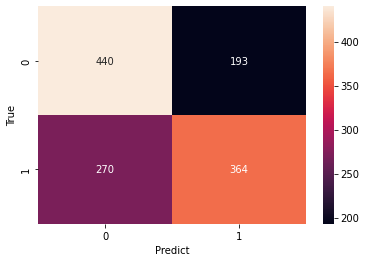

In [37]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('True')


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       633
           1       0.65      0.57      0.61       634

    accuracy                           0.63      1267
   macro avg       0.64      0.63      0.63      1267
weighted avg       0.64      0.63      0.63      1267

